In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

from pipeline import AnomalyDetectionPipeline

In [2]:
data = 'data/2015-01-02-TOTF.PA-book.csv.gz'

In [3]:
# Initialize Pipeline
pipeline = AnomalyDetectionPipeline(seq_length=25, batch_size=128)

Pipeline initialized on device: cuda


In [4]:
# Load Data
pipeline.load_data(data)

Loading data from data/2015-01-02-TOTF.PA-book.csv.gz...


In [5]:
# Engineer Features
selected_features = ['base', 'tao', 'hawkes', 'poutre']
pipeline.engineer_features(feature_sets=selected_features)

Engineering features: ['base', 'tao', 'hawkes', 'poutre']...
Feature Engineering complete. Total features: 116


In [6]:
# Preprocess Data
pipeline.scale_and_sequence(method='minmax')

Preprocessing with method: minmax...
Data split: Train (448282, 25, 116), Test (192122, 25, 116)


In [7]:
# Train Model
pipeline.train_model(
    model_type='transformer_ocsvm', 
    epochs=2, 
    lr=1e-3,
    nu=0.01
)

Initializing Transformer Autoencoder...
Training Autoencoder...
Epoch 1/2 - Loss: 0.006087
Epoch 2/2 - Loss: 0.001360
Extracting Latent Representations for OC-SVM...
Training One-Class SVM (nu=0.01)...


Evaluating model...
{'AUROC': 1.0, 'AUPRC': 1.0, 'F4_Score': 0.999014466723111}


<Figure size 600x600 with 0 Axes>

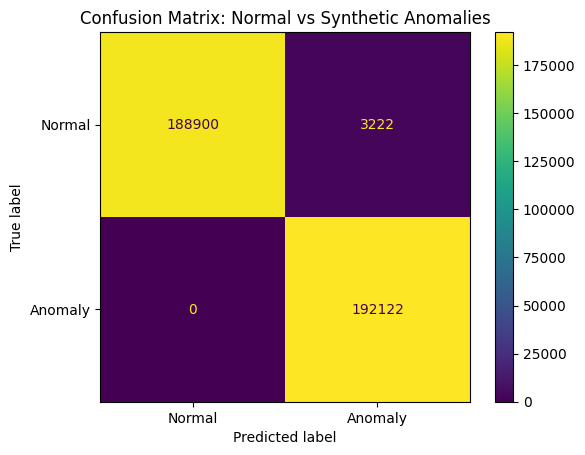

In [8]:
# Evaluate Model
metrics, cm = pipeline.evaluate()

print(metrics)
fig = plt.figure(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Anomaly"])
disp.plot()
plt.title("Confusion Matrix: Normal vs Synthetic Anomalies")
plt.show()

Calculating Feature Importance (Permutation)...


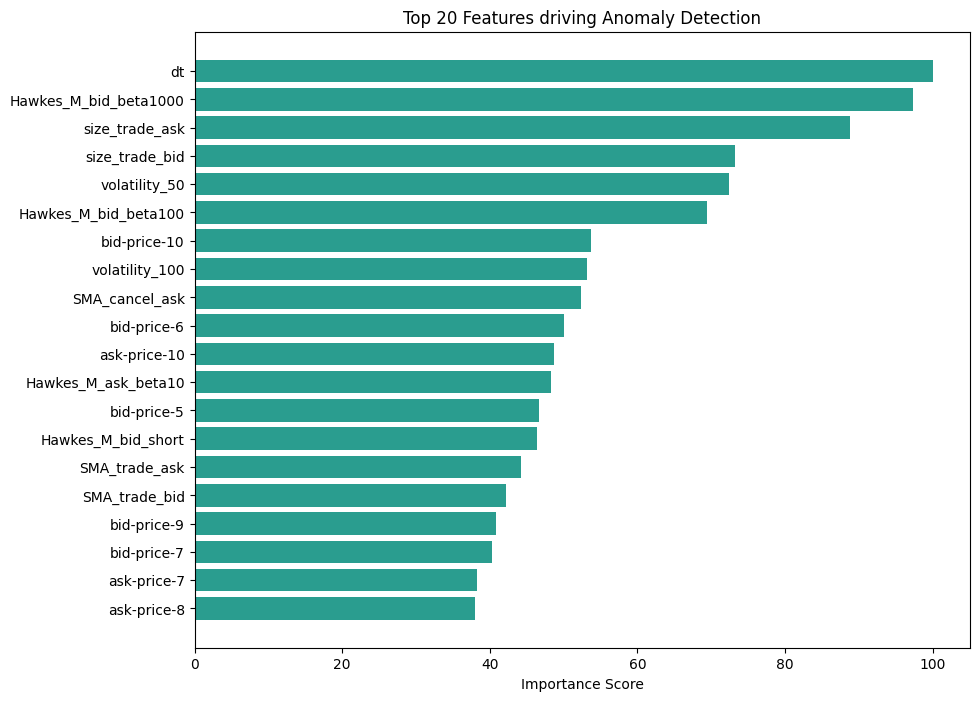

In [9]:
# Explainability
importance_df = pipeline.get_feature_importance(n_repeats=3)

top_20 = importance_df.head(20)
plt.figure(figsize=(10, 8))
plt.barh(top_20['Feature'], top_20['Importance'], color='#2a9d8f')
plt.xlabel('Importance Score')
plt.title('Top 20 Features driving Anomaly Detection')
plt.gca().invert_yaxis()
plt.show()